In [1]:
!pip install pyspark

In [1]:
from pyspark.sql import SparkSession

#local[*] - испольуется локальный мастер(в памяти приложения) с максимально возможным количеством потоков

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

## Расчет количества слов в файле

## Анализ данных фондовой биржи(данные о ценах на акции в США с января 2019 года по июль 2020 года)

### [Датасет](https://www.kaggle.com/datasets/dinnymathew/usstockprices)

In [4]:
#Чтение данных в dataframe

data = spark.read.csv(
    'stocks_price_final.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [5]:
#Использование схемы 

from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [7]:
#Список столбцов

data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [8]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [11]:
# Выбор одного столбца
data.select('sector').show(5)

# Выбор нескольких столбцов
data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [12]:
# фильтрация

from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-02|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-03|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-06|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology

In [26]:
from pyspark.sql import functions as f

data\
    .filter( (col('adjusted') >= lit(100)) & (col('adjusted') <= lit(250))) \
    .select('open', 'close', 'adjusted', f
            .when(data.adjusted >= 200.0, 'grater than 200.0')
            .when(data.adjusted >= 190.0, 'grater than 190.0')
            .otherwise('less than 190.0')
            .alias('Adjusted is'))\
    .show(100)

+----------+----------+----------+-----------------+
|      open|     close|  adjusted|      Adjusted is|
+----------+----------+----------+-----------------+
| 95.459999|100.790001|100.790001|  less than 190.0|
| 99.760002|103.209999|103.209999|  less than 190.0|
|104.620003|106.620003|106.620003|  less than 190.0|
|222.699997|204.869995|204.869995|grater than 200.0|
|197.970001|200.619995|200.619995|grater than 200.0|
|207.179993|204.529999|204.529999|grater than 200.0|
|205.800003|200.479996|200.479996|grater than 200.0|
|198.949997|189.929993|189.929993|  less than 190.0|
|190.229996|191.699997|191.699997|grater than 190.0|
|191.300003|     191.0|     191.0|grater than 190.0|
|188.669998|191.720001|191.720001|grater than 190.0|
|189.360001|197.149994|197.149994|grater than 190.0|
|194.029999|190.130005|190.130005|grater than 190.0|
|190.919998|192.059998|192.059998|grater than 190.0|
|192.639999|193.009995|193.009995|grater than 190.0|
|     195.0|192.309998|192.309998|grater than 

In [27]:
# использование шаблонов

data.select(
    'sector', 
    data.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
).distinct().show()

+--------------------+-----------------------------------+
|              sector|Колонка sector начинается с B или C|
+--------------------+-----------------------------------+
|         Health Care|                              false|
|       Capital Goods|                               true|
|Consumer Non-Dura...|                               true|
|    Public Utilities|                              false|
|   Consumer Durables|                               true|
|             Finance|                              false|
|      Transportation|                              false|
|       Miscellaneous|                              false|
|   Consumer Services|                               true|
|              Energy|                              false|
|    Basic Industries|                               true|
|          Technology|                              false|
+--------------------+-----------------------------------+



In [28]:
# группировка и поиск среднего

data.select(['industry', 'open', 'close', 'adjusted'])\
    .groupBy('industry')\
    .mean()\
    .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Biotechnology: Bi...| 24.80808319232426|24.803587149935417| 24.74507997827317|
|Other Specialty S...| 84.80718810562857|  84.8027655092983| 84.55525036482354|
|Biotechnology: El...| 33.36891734535046| 33.33611913546896| 33.21022605613575|
|Other Consumer Se...| 43.67010744224604|43.658688711464826|43.434989808790206|
|Electric Utilitie...| 41.35569183903102|41.371055593573246| 40.39245735242004|
|        Water Supply| 40.58048308203543| 40.58487374462943| 40.17332791487648|
|               Banks| 21.44122960768001| 21.44016833104001|21.029210073439994|
|Farming/Seeds/Mil...|27.740143444117308

In [29]:
# более сложная агрегация

from pyspark.sql import functions as f

data.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')))\
    .groupBy("sector") \
    .agg(f.min("data").alias("С"), 
         f.max("data").alias("По"), 
         
         f.min("open").alias("Минимум при открытии"),
         f.max("open").alias("Максимум при открытии"), 
         f.avg("open").alias("Среднее в open"), 

         f.min("close").alias("Минимум при закрытии"), 
         f.max("close").alias("Максимум при закрытии"), 
         f.avg("close").alias("Среднее в close"), 

         f.min("adjusted").alias("Скорректированный минимум"), 
         f.max("adjusted").alias("Скорректированный максимум"), 
         f.avg("adjusted").alias("Среднее в adjusted"), 

      ).show(truncate=False)

+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|sector               |С         |По        |Минимум при открытии|Максимум при открытии|Среднее в open    |Минимум при закрытии|Максимум при закрытии|Среднее в close   |Скорректированный минимум|Скорректированный максимум|Среднее в adjusted|
+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16                |690.0                |51.51619596530087 |0.16                |691.099976           |51.54953412269036 |0.16                     |691.099976                |51.21050733851895 |
|Health Care          |2019-01-0

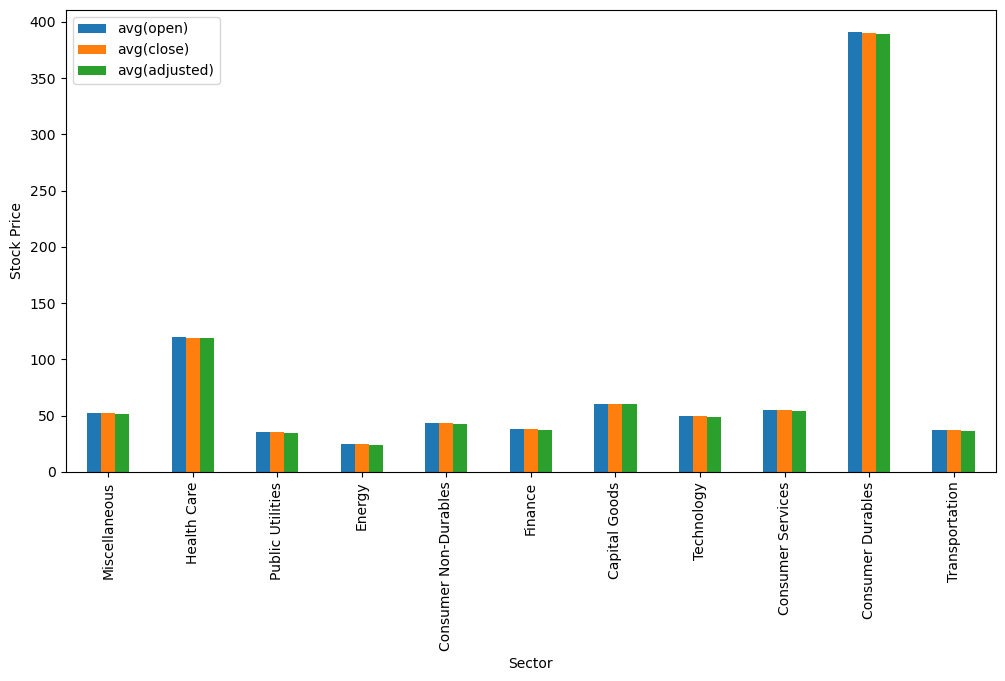

In [31]:
# Интеграция с pandas

!pip install matplotlib

from matplotlib import pyplot as plt

sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='Stock Price', xlabel='Sector')
plt.show()

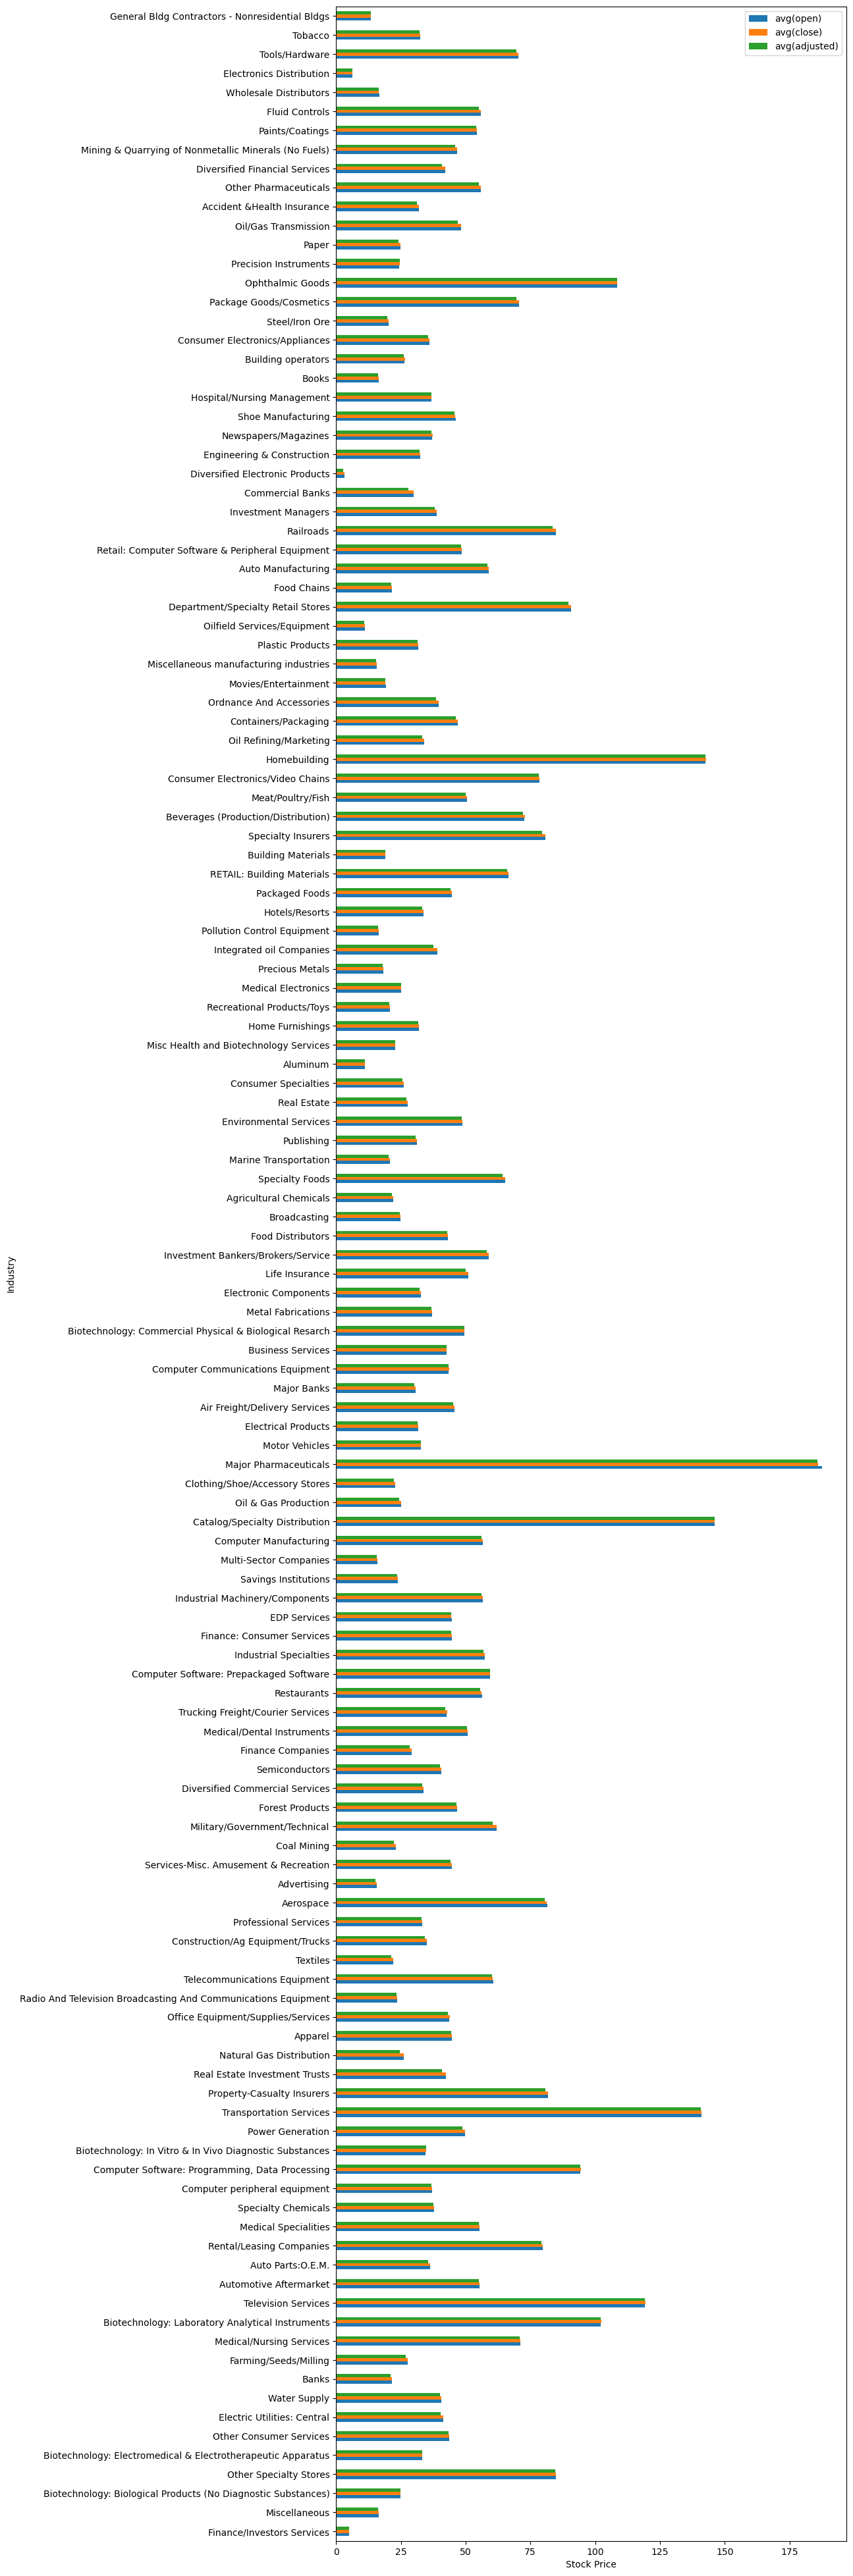

In [32]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel='Industry')

plt.show()

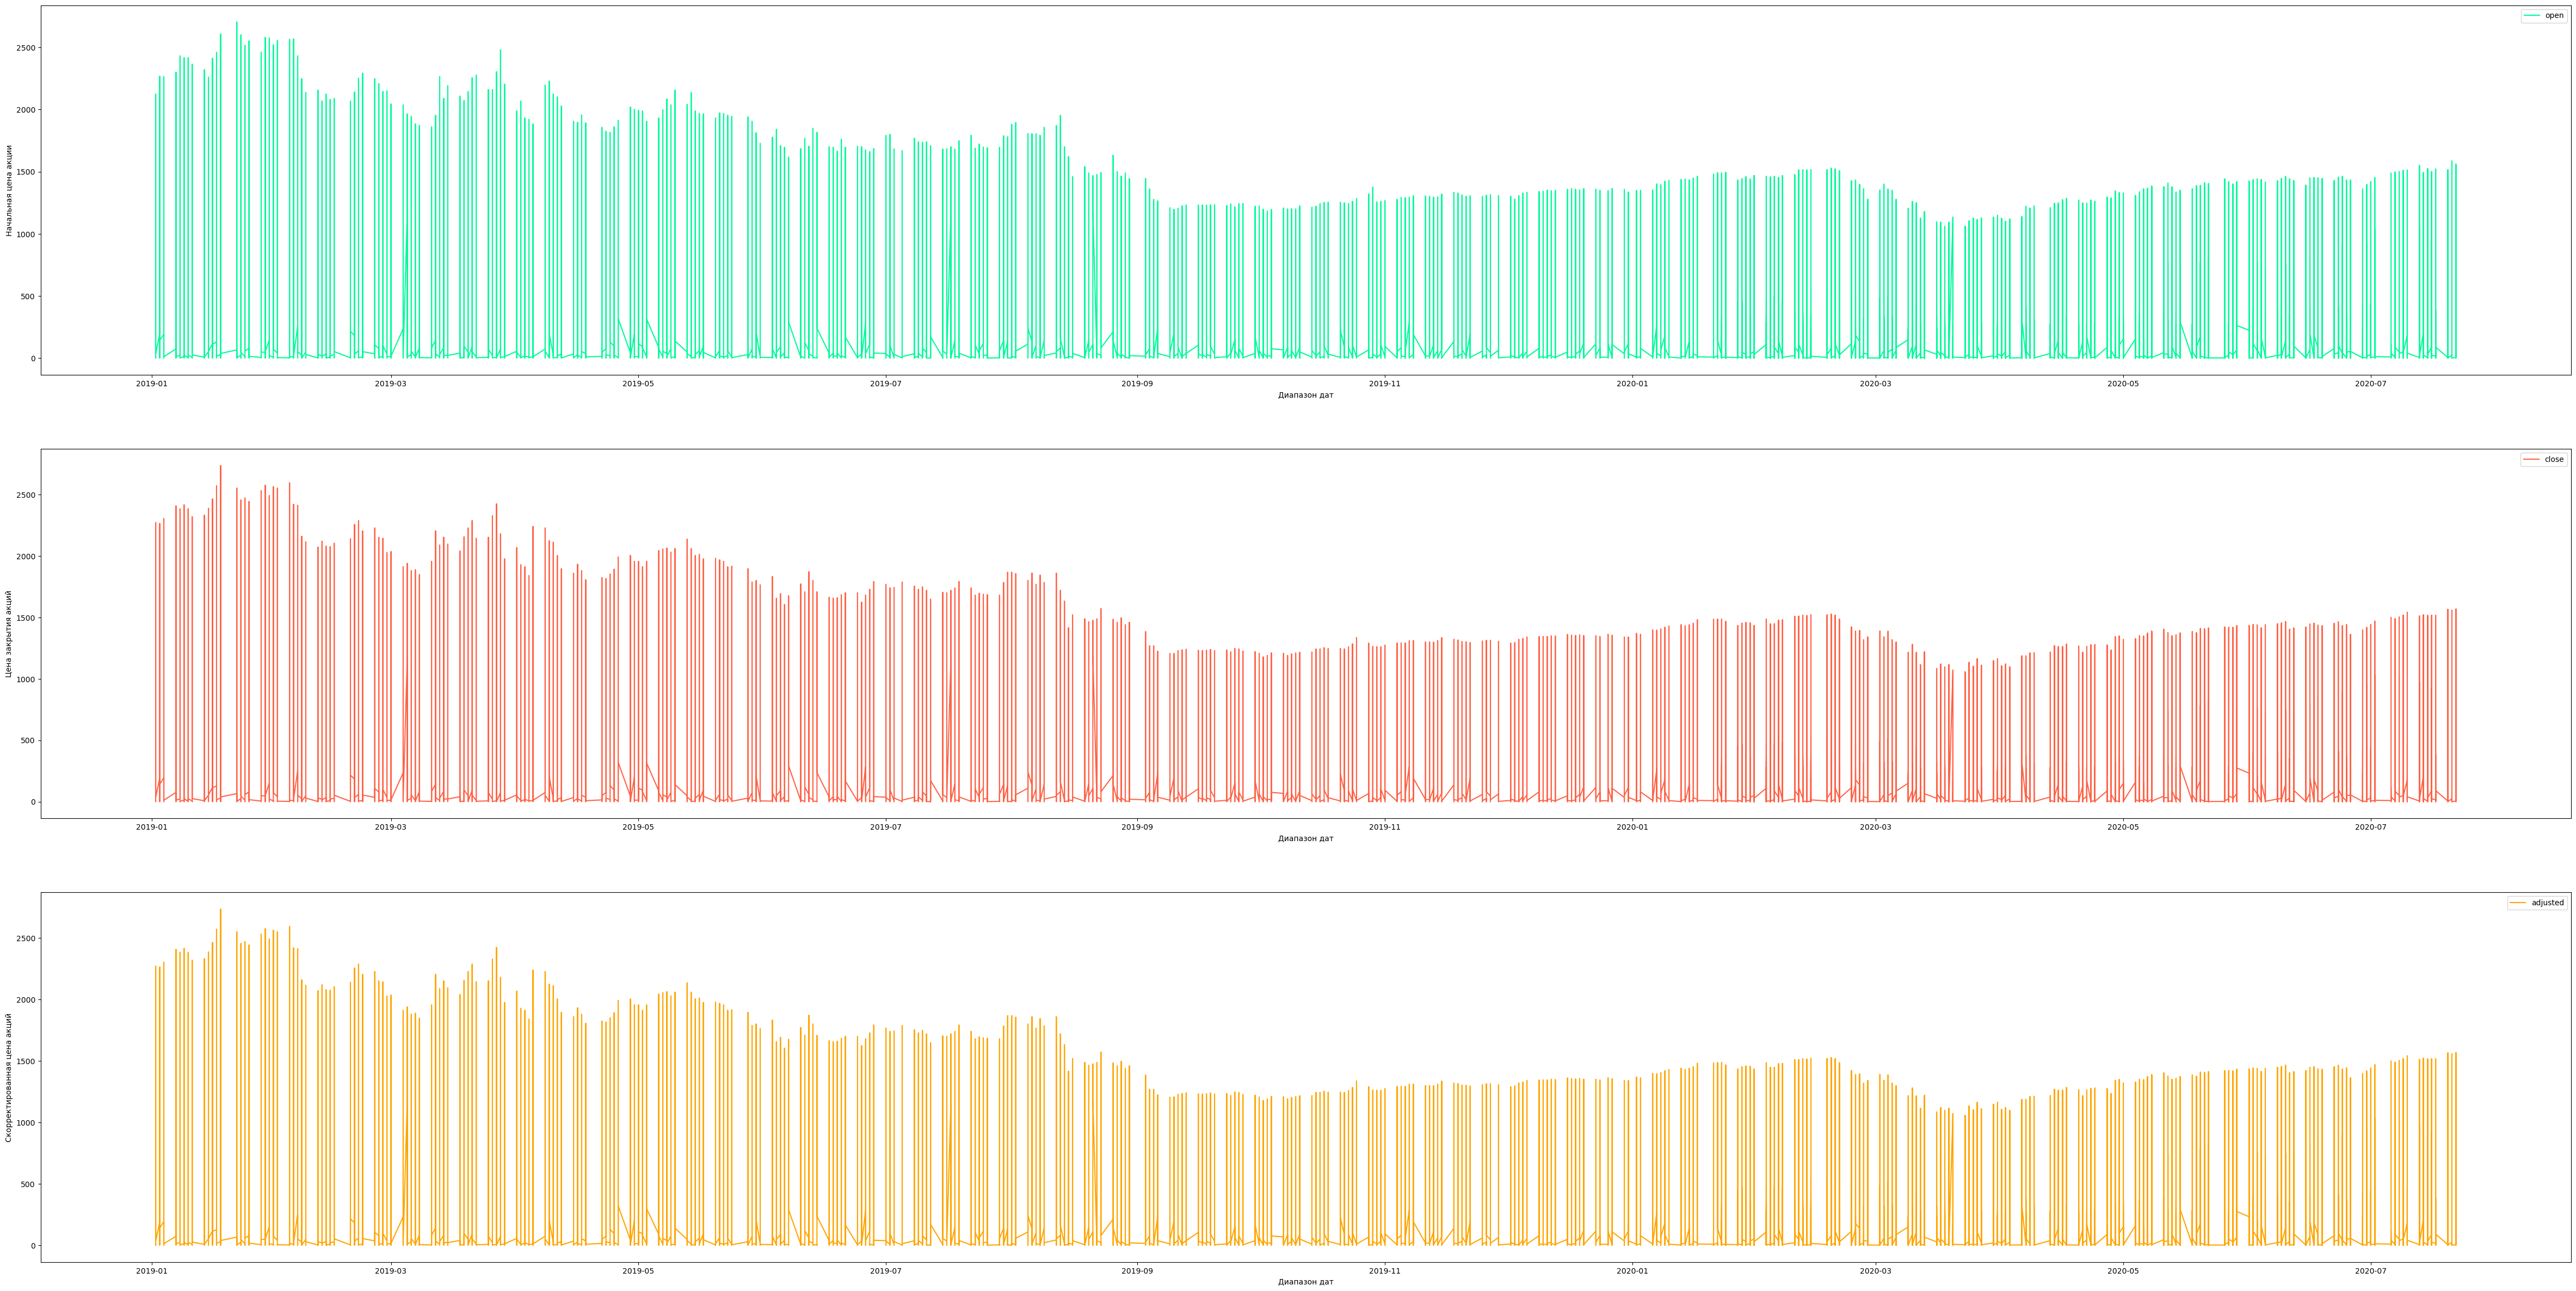

In [33]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))
tech.toPandas().plot(kind='line', x='data', y='open', 
                     xlabel='Диапазон дат', ylabel='Начальная цена акции', 
                     ax=axes[0], color='mediumspringgreen')
tech.toPandas().plot(kind='line', x='data', y='close',
                     xlabel='Диапазон дат', ylabel='Цена закрытия акций',
                     ax=axes[1], color='tomato')
tech.toPandas().plot(kind='line', x='data', y='adjusted', 
                     xlabel='Диапазон дат', ylabel='Скорректированная цена акций', 
                     ax=axes[2], color='orange')

plt.show()